# <center> Unsupervised Learning Methods </center>
## <center> Problem Set 1 </center>
### <center> Optimization and Clustering </center>

## 1.1 Convexity ##


1.1.1

Lets prove that $$R_{\geq0}^d$$ is convex

let $$0 \leq t \leq 1$$ and $$x,y \in R_{\geq0}^d$$
then for any $$ 0 \leq i \leq d$$ if  $$z = x + y$$

$$z_i = x_i + y_i \geq x_i \geq 0$$ so $$z \in  R_{\geq0}^d$$
so $$R_{\geq0}^d$$ is convex, as required

1.1.2

lets prove by induction for any For $$N \geq 2$$
base: $$N = 2$$
Then it derived by the definition of convexity. 
Lets assume correctnes for any $$N \in \mathbb{N}$$
and prove for $$N + 1$$
let $${x_i \in C}_{i=1}^{N+1}$$
and $$\sum_{i=1}^{N+1}\alpha_i = 1$$
Lets looks at $$\sum_{i=1}^{N+1}\alpha_i \cdot x_i = \sum_{i=1}^{N-1}\alpha_i \cdot x_i + (\alpha_n + \alpha_{n+1}) \cdot x_n - \alpha_{n+1} \cdot x_n + \alpha_{n+1}x_{n+1}$$

from the induction assumption we have in hand that 

1.1.3

Lets prove 
lets choose $\alpha_1 = \alpha_2 = ... = \alpha_9 = 9$ and $\alpha_10 = 1$ and some ${x_i}_{i=1}^9$ and $x_{10} = y$ then the convex combination $\sum_{i=1}^10\alpha_i\cdot x_i = y$ as required

## 1.2 The gradient ##


1.2.1



In [88]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib
import timeit


matplotlib.rc('font', **{'size' : 16})

 # 1. Optimization

## 1.3 Descent Methods

### Gradient descent
* Let $\boldsymbol{Y}\in\mathbb{R}^{d\times d}$ be a blurred version
of the image $\boldsymbol{X}\in\mathbb{R}^{d\times d}$:
$$\boldsymbol{Y}=\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}$$
where $\boldsymbol{H}\in\mathbb{R}^{d\times d}$ is a known (separable)
blurring matrix.

#### Load the data ($\boldsymbol{Y}$ and $\boldsymbol{H}$):

In [89]:
from scipy.io import loadmat

data = loadmat('data.mat')
Y    = data['Y']
H    = data['H']

Y.shape, H.shape

((256, 256), (256, 256))

#### Plot $Y$ and $H$:

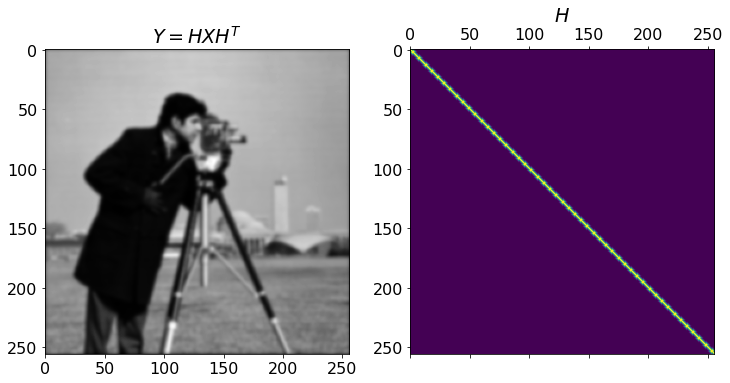

In [90]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y, cmap='gray')
ax[1].matshow(H)
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$H$')
plt.show()


array([[0.25351573, 0.34021074, 0.38101457, ..., 0.37138647, 0.33074403,
        0.24608699],
       [0.34024388, 0.45651384, 0.51139474, ..., 0.49897636, 0.44442247,
        0.33064559],
       [0.38069451, 0.51080761, 0.57252658, ..., 0.55855751, 0.4977208 ,
        0.37035391],
       ...,
       [0.29352775, 0.39588593, 0.44215549, ..., 0.45237976, 0.40246206,
        0.29508926],
       [0.26699955, 0.36321509, 0.41048309, ..., 0.41265437, 0.36502744,
        0.26637461],
       [0.20105412, 0.27544427, 0.31456555, ..., 0.30785579, 0.27199876,
        0.19833139]])

* Our goal is to find $\boldsymbol{X}$ that minimizes:
$$\boldsymbol{X}^{\star}=\arg\min_{\boldsymbol{X}}f\left(\boldsymbol{X}\right)=\arg\min_{\boldsymbol{X}}\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

### 1.3.1
1. Find a closed form expression for $\boldsymbol{X}^{\star}$ as a function of $\boldsymbol{Y}$ and $\boldsymbol{H}$.
2. Compute $\boldsymbol{X}^{\star}$ and plot it.

since we are trying to minimize a convex function $$\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$ 
Then we can diffrentiate it and find the stationary point 

Lets define 
$$f = ||Y - HXH^T||^2_F$$
then $\frac{df}{dx} = -2HH(Y - HXH^T)$

current loss 5.766231, itr: 0
current loss 0.126738, itr: 1000
current loss 0.095086, itr: 2000
current loss 0.080282, itr: 3000
current loss 0.071233, itr: 4000
current loss 0.064938, itr: 5000
current loss 0.060211, itr: 6000
current loss 0.056475, itr: 7000
current loss 0.053416, itr: 8000
current loss 0.050843, itr: 9000
current loss 0.048633, itr: 10000
current loss 0.046706, itr: 11000
current loss 0.045003, itr: 12000
current loss 0.043483, itr: 13000
current loss 0.042115, itr: 14000
current loss 0.040875, itr: 15000
current loss 0.039744, itr: 16000
current loss 0.038706, itr: 17000
current loss 0.037750, itr: 18000
current loss 0.036867, itr: 19000
current loss 0.036046, itr: 20000
current loss 0.035282, itr: 21000
current loss 0.034569, itr: 22000
current loss 0.033901, itr: 23000
current loss 0.033273, itr: 24000
current loss 0.032683, itr: 25000
current loss 0.032127, itr: 26000
current loss 0.031601, itr: 27000
current loss 0.031103, itr: 28000
current loss 0.030631, itr:

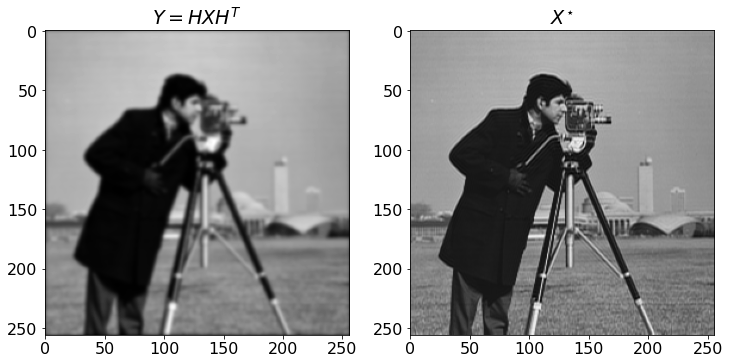

In [50]:
'''
Your code here...
'''

def compute_gradient(Xstar):
    return -2 * H.dot(H.T).dot(Y - H.dot(Xstar).dot(H.T))

Xstar  = Y
alpha = 0.9
iterations = 100000
current_loss  = np.linalg.norm(Y - H.dot(Xstar).dot(H.T))
start = timeit.timeit()

for itr in ranged(iterations):    
    if itr % 1000 == 0:
        print('current loss %f, itr: %d' % (current_loss, itr))    
    current_loss  = np.linalg.norm(Y - H.dot(Xstar).dot(H.T)) ** 2
    Xstar = Xstar - alpha * compute_gradient(Xstar)
    if current_loss < 0.03:
        break

end = timeit.timeit()
print()
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y,     cmap='gray')
ax[1].imshow(Xstar, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
print('final loss: %f, time: %f' % (current_loss, (end - start)))
plt.show()

------------------------------------------------------------------------------------------------------
* To avoid matrix inversion, we will find $\boldsymbol{X}^{\star}$ using gradient descent.
### 1.3.2
1. Implement the following functions where
$$f\left(\boldsymbol{X}\right)=\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

```python
#==================================================#
def f(X):
    '''
    f(X) = ||Y - HXH^T||_F^2 is the objective function
    '''
    return np.linalg.norm(Y - H.dot(Xstar).dot(H.T)) ** 2
#==================================================#
#==================================================#
def Df(X):
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    return -2 * H.dot(H.T).dot(Y - H.dot(Xstar).dot(H.T))
#==================================================#
#==================================================#
def ApplyGradientDescent(f, Df, X0, lr, ε):
    '''
    Apply gradient descent.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    pass
#==================================================#
```

2. Set a reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 

In [91]:
import time

#==================================================#
def f(X):
    '''
    f(X) = ||Y - HXH^T||_F^2 is the objective function
    '''
    return np.linalg.norm(Y - H.dot(X).dot(H.T)) ** 2
#==================================================#
#==================================================#
def Df(X):
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    return -2 * H.dot(H.T).dot(Y - H.dot(X).dot(H.T))
#==================================================#
#==================================================#
def ApplyGradientDescent(f, Df, X0, lr, epsilon):
    '''
    Apply gradient descent.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    current_x = X0
    iterations = 500000
    for itr in range(iterations):    
        if itr % 1000 == 0:
            print('current loss %f, itr: %d, x[0][0]: %f' % (f(current_x), itr, current_x[0][0]))
        current_x = current_x - lr * Df(current_x)
        if f(current_x) < epsilon:
            print('converged!!')
            return current_x
    print('did not converged')
    return current_x

X0 = Y
epsilon = 0.0001
lr = 0.95
start = time.time()

Xstar = ApplyGradientDescent(f, Df, X0, lr, epsilon)

end = time.time()
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y,     cmap='gray')
ax[1].imshow(Xstar, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
print('final loss: %f, time: %f' % (f(Xstar), (end - start)))
plt.show()

current loss 33.249416, itr: 0, x[0][0]: 0.253516
current loss 0.016049, itr: 1000, x[0][0]: 0.578083
current loss 0.009038, itr: 2000, x[0][0]: 0.586115
current loss 0.006443, itr: 3000, x[0][0]: 0.590225
current loss 0.005073, itr: 4000, x[0][0]: 0.592828
current loss 0.004216, itr: 5000, x[0][0]: 0.594671
current loss 0.003625, itr: 6000, x[0][0]: 0.596072
current loss 0.003189, itr: 7000, x[0][0]: 0.597189
current loss 0.002853, itr: 8000, x[0][0]: 0.598112
current loss 0.002585, itr: 9000, x[0][0]: 0.598893
current loss 0.002365, itr: 10000, x[0][0]: 0.599567
current loss 0.002181, itr: 11000, x[0][0]: 0.600157
current loss 0.002025, itr: 12000, x[0][0]: 0.600681
current loss 0.001891, itr: 13000, x[0][0]: 0.601149
current loss 0.001774, itr: 14000, x[0][0]: 0.601571
current loss 0.001671, itr: 15000, x[0][0]: 0.601954
current loss 0.001579, itr: 16000, x[0][0]: 0.602303
current loss 0.001498, itr: 17000, x[0][0]: 0.602624
current loss 0.001425, itr: 18000, x[0][0]: 0.602918
curre

KeyboardInterrupt: 

------------------------------------------------------------------------------------------------------
### Momentum
* <ins>Momentum</ins> is an effective method to improve convergence rate.
* Gradient descent update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)$$
* Momentum update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-1\right)}-\boldsymbol{x}^{\left(t-2\right)}\right)$$
where $\beta\in[0,1)$ and typically $0.9\leq\beta\leq0.99$.

### 1.3.3
Show that $\boldsymbol{x}^{\left(t\right)}$ can be expressed by:
$$\boldsymbol{x}^{\left(t+1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$

------------------------------------------------------------------------------------------------------
### 1.3.4
1. Implement the following function:

```python
def ApplyGradientDescentMomentum(f, Df, X0, lr, β, ε):
    '''
    Apply gradient descent with momentum.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        β  - Momentum decaying factor
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    pass
```

2. Set (the same) reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 
    * Compare the run-time performance with and without momentum.  
      (play with the hyper-parameters).
        * **2% Bonus:**  
            Plot the objective value $f(\boldsymbol{X})$ as a function of the iterations.  
            You may need to slightly modify your code.

current loss 33.249416, itr: 0, x[0][0]: 0.253516
current loss 0.002366, itr: 1000, x[0][0]: 0.599589
current loss 0.001299, itr: 2000, x[0][0]: 0.603455
current loss 0.000911, itr: 3000, x[0][0]: 0.605235
current loss 0.000711, itr: 4000, x[0][0]: 0.606280
current loss 0.000589, itr: 5000, x[0][0]: 0.606983
current loss 0.000507, itr: 6000, x[0][0]: 0.607503
current loss 0.000446, itr: 7000, x[0][0]: 0.607910
current loss 0.000400, itr: 8000, x[0][0]: 0.608243
current loss 0.000363, itr: 9000, x[0][0]: 0.608523
current loss 0.000332, itr: 10000, x[0][0]: 0.608764
current loss 0.000307, itr: 11000, x[0][0]: 0.608975
current loss 0.000286, itr: 12000, x[0][0]: 0.609162
current loss 0.000267, itr: 13000, x[0][0]: 0.609329
current loss 0.000251, itr: 14000, x[0][0]: 0.609480
current loss 0.000237, itr: 15000, x[0][0]: 0.609617
current loss 0.000224, itr: 16000, x[0][0]: 0.609743
current loss 0.000213, itr: 17000, x[0][0]: 0.609858
current loss 0.000202, itr: 18000, x[0][0]: 0.609964
curre

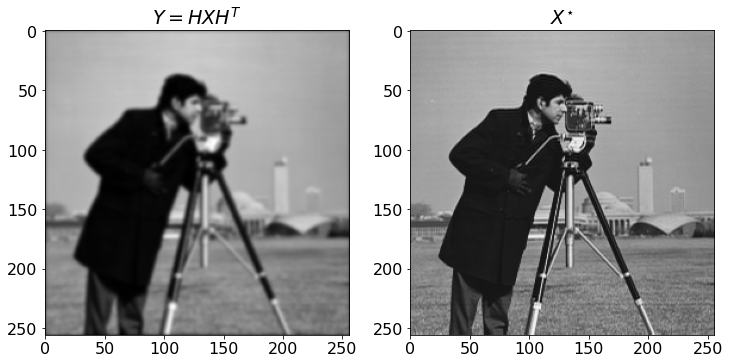

In [94]:
def ApplyGradientDescentMomentum(f, Df, X0, lr, beta, epsilon):
    '''
    Apply gradient descent with momentum.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        β  - Momentum decaying factor
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    current_x = x_1 = x_2 = X0
    
    iterations = 500000
    for itr in range(iterations):    
        if itr % 1000 == 0:
            print('current loss %f, itr: %d, x[0][0]: %f' % (f(current_x), itr, current_x[0][0]))
        x_2 = x_1
        x_1 = current_x
        current_x = current_x - lr * Df(current_x) + beta * (x_1 - x_2)
        if f(current_x) < epsilon:
            print('converged!!')
            return current_x
    print('did not converge')    
    return current_x


X0 = Y
epsilon = 0.0001
lr = 0.95
start = time.time()
beta = 0.99

Xstar = ApplyGradientDescentMomentum(f, Df, X0, lr, beta, epsilon)

end = time.time()
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y,     cmap='gray')
ax[1].imshow(Xstar, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
print('final loss: %f, time: %f' % (f(Xstar), (end - start)))
plt.show()

------------------------------------------------------------------------------------------------------
# 2. Clustering
## 2.1 K-Means
### 2.1.3
Implement the K-Means algorithm.
```python
def KMeans(mX, K):
    '''
    Apply K-Means
    Args:
        mX   - Input data,         mX.shape = d, N
        K    - Number of clusters, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        mMu  - Clusters' centers,                          mMu.shape  = d, K
        
    '''
    pass
```
**Notes**:
* The algorithm halts when no update occur.  
* **4% Bonus**: Implement the K-Menas++ initialization: https://en.wikipedia.org/wiki/K-means%2B%2B
------------------------------------------------------------------------------------------------------

In [ ]:
'''
Your code here...
'''

### Super-pixels
1. Load the `Fruits.jpeg` image and covert it to NumPy ndarray `mI`:
$$\boldsymbol{I}\in\mathbb{R}^{\text{height}\times\text{width}\times3}$$
2. Use the LAB color space (instead of RGB) (`mLAB`).
3. Create a new "image" `mX` such that:
$$\boldsymbol{X}\in\mathbb{R}^{\text{height}\times\text{width}\times5}$$
where:
    * The first 3 channels are the LAB image.
    * The 4th channel is the $x$ position.
    * The 5th channel is the $y$ position.
4. Apply K-Means to the pixels of `mX` (set a reasonable $K$).
5. Create a mask image `mMask` such that:
$$\boldsymbol{M}\in\mathbb{R}^{\text{height}\times\text{width}}$$
where each pixel in `mMask` is the cluster index of the corresponding pixel in `mI`.
6. Plot the segmentation (Superpixels) map.

**Tip:** Try different weights for the LAB image and the XY position.

In [ ]:
from PIL                  import Image
from skimage              import color
from skimage.segmentation import mark_boundaries

oImage = Image.open('Fruits.jpeg')
oImage

In [ ]:
mI   = np.array(oImage)
mLAB = color.rgb2lab(mI)

'''
Your code here...
'''

mO = mark_boundaries(mI, mMask, color=(0,1,1))

plt.figure(figsize=(12, 12))
plt.imshow(mO)
plt.show()

------------------------------------------------------------------------------------------------------
## 2.2 GMM
The GMM algorithm aims to maximize the (log) likelihood objective:
$$\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}f=\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}\sum_{i=1}^{N}\log\left(\sum_{k=1}^{K}w_{k}\mathcal{N}\left(\boldsymbol{x}_{i};\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right)$$
### 2.2.3
Implement the GMM algorithm.
```python
def GMM(mX, K, ε=1e-6, maxIter=100):
    '''
    Apply GMM
    Args:
        mX      - Input data,                   mX.shape = d, N
        K       - Number of clusters,           positive integer
        ε       - Stopping criterion threshold, positive real
        maxIter - Maximum number of iterations, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        vW   - The weight of each Gaussian,                vW.shape   = K
        mMu  - Centers,                                    mMu.shape  = d, K
        mSig - Covariance,                                 mSig.shape = d, d, K
    '''
    pass
```
**Notes**:
* Stopping criteria:
    * The objective $f$ has changed less than $\epsilon$.
    * Maximum number of iteration.
* The index $s$ of the point $\boldsymbol{x}_i$ is defined by:
$$\boldsymbol{x}_{i}\in\mathcal{D}_{s} \iff s=\arg\max_{k}w_{k}\mathcal{N}\left(\boldsymbol{x}_{i},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)$$
* **2% Bonus:** Use [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) and avoid `for` loops in step II. 


In [ ]:
'''
Your code here...
'''

------------------------------------------------------------------------------------------------------
Consider the following data:

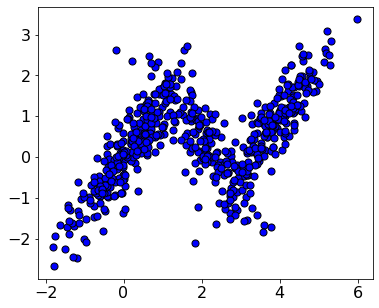

In [7]:
import scipy.stats
import scipy as sp


np.random.seed(0)

N1    = 250
N2    = 150
N3    = 200

vMu1  = np.array([0, 0])
vMu2  = np.array([2, 0.5])
vMu3  = np.array([4, 1])

mSig1 = .5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mSig2 = .5 * np.array([[ 1.00, -1.25],
                       [-1.25,  2.00]])

mSig3 = .5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mX1 = sp.stats.multivariate_normal.rvs(mean=vMu1, cov=mSig1, size=N1)
mX2 = sp.stats.multivariate_normal.rvs(mean=vMu2, cov=mSig2, size=N2)
mX3 = sp.stats.multivariate_normal.rvs(mean=vMu3, cov=mSig3, size=N3)
mX  = np.r_[mX1, mX2, mX3].T

plt.figure(figsize=(6,5))
plt.scatter(mX[0,:], mX[1,:], s=50, edgecolors='k', color='b')
plt.axis('equal')
plt.axis('tight')
plt.show()

### 2.2.4 Compare K-Means to GMM 
* Set $K=3$ and apply K-Means and GMM to the above dataset.
* Repeat several times.

In [ ]:
'''
Your code here...
'''

------------------------------------------------------------------------------------------------------
## 2.4 DBSCAN
### 2.4.1
Implement the DBSCAN algorithm.
```python
def DBSCAN(mX, Z, r):
    '''
    Apply DBSCAN
    Args:
        mX   - Input data,                                   mX.shape = d, N
        Z    - Number of points required to be a core point, positive integer
        r    - Neighborhood radius,                          positive real.
    Output:
        vIdx - Index of the cluster each point belongs to,   vIdx.shape = N
    '''
    pass
```
**Notes**:
* Noise points should have index `-1`.
* Implement an auxiliary function to compute connected components (using BFS or DFS).

In [ ]:
'''
Your code here...
'''

### 2.4.2 Comparison
1. Consider the following datasets:

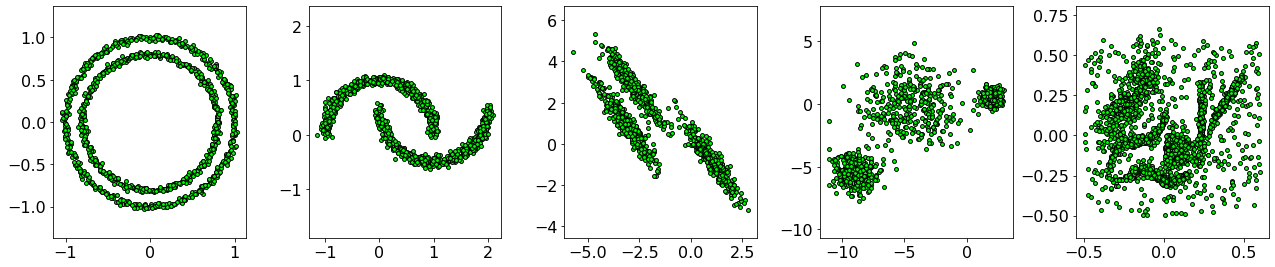

In [8]:
from sklearn import datasets

np.random.seed(0)

N   = 1000
A   = np.array([[0.6, -0.6],
                [-0.4, 0.8]]);
mX1 = datasets.make_circles(n_samples=N, noise=0.02)      [0]
mX2 = datasets.make_moons  (n_samples=N, noise=0.05)      [0]
mX3 = datasets.make_blobs  (n_samples=N, random_state=170)[0] @ A
mX4 = datasets.make_blobs  (n_samples=N, random_state=170, cluster_std=[.8, 2, .4])[0] 
mX5 = np.load('clusterable_data.npy')

lDatasets = [mX1, mX2, mX3, mX4, mX5]

fig, ax = plt.subplots(1, 5, figsize=(18, 4))
for ii, ax in enumerate(fig.axes):
    mXi = lDatasets[ii]
    ax.scatter(*mXi.T, c='lime', s=15, edgecolor='k')
    ax.axis('equal')
    
plt.tight_layout()
plt.show()

2. Apply and compare your clustering methods to these datasets.
    * **2% Bonus:**  
    Add to your comparison the hierarchical and HDBSCAN methods.  
    You may use existing libraries for these methods.
    
**Note:** The datasets are transposed.

In [ ]:
'''
Your code here...
'''